In [1]:
import json
import pandas
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

#   Resolve um bug de "Could not create cudnn handle: CUDNN_STATUS_INTERNAL_ERROR"
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
#

%load_ext tensorboard

In [2]:
#   Aqui vamos fazer alguma brincadeirinhas com nosso modelo treinado.
#   Primeiro de tudo, precisamos carregar o modelo e os pesos do disco.
model = keras.models.model_from_json(open('architecture.json').read())
model.load_weights('model_checkpoint.hdf5')

In [3]:
#   Em seguida, o compilamos novamente
model.compile(  optimizer='adam',
                loss='mse')

In [4]:
#   Vamos ver nosso modelo novamente
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [5]:
#   Em seguida, vamos avaliar nosso modelo. Para isso, precisamos carregar novamente os dados de treinamento.
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

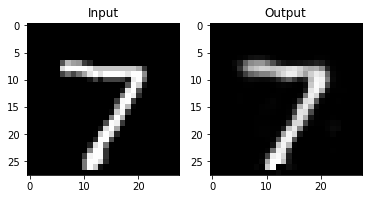

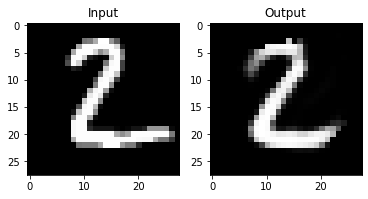

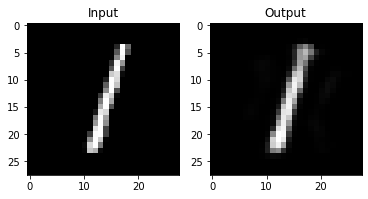

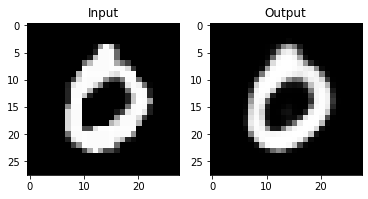

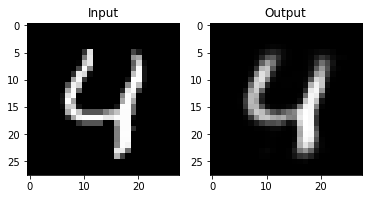

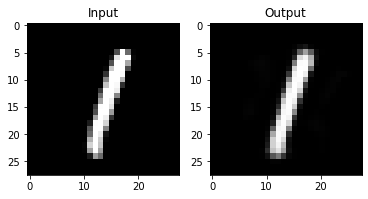

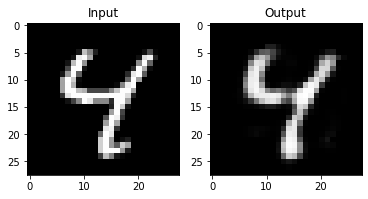

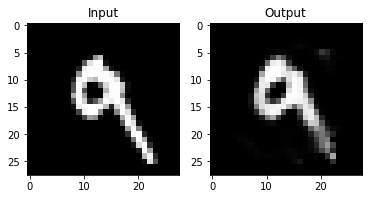

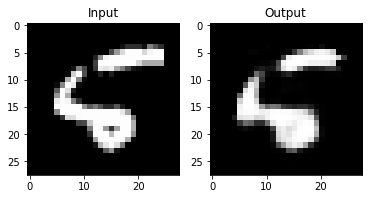

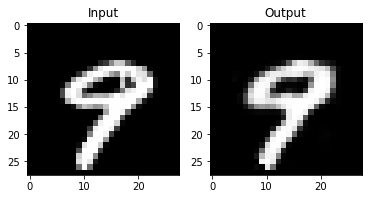

In [31]:
# Mostra algumas predicoes, com a imagem original e a imagem recriada
n = 10

for i in range(n):
    figure, axis = plt.subplots(1, 2)
    axis[0].imshow(test_images[i], cmap='gray')
    prediction = np.squeeze(model.predict(np.expand_dims(test_images[i], 0)))
    axis[1].imshow(prediction, cmap='gray')
    
    axis[0].title.set_text('Input')
    axis[1].title.set_text('Output')

In [7]:
# Tambem podemos carregar os dados de treinamento e vizualiza-los no tensorboard

%tensorboard --logdir logs

Reusing TensorBoard on port 6007 (pid 14634), started 1:06:17 ago. (Use '!kill 14634' to kill it.)

In [8]:
# Redes Autoencoder são conhecidas por conseguirem eliminar ruído de imagem
# Vamos passar imagens ruidosas pela rede e observar as saídas

In [23]:
# Uma função que adiciona um ruído gaussiano a uma imagem
def add_noise(image):
    row,col = image.shape
    mean = 0
    var = 0.004
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    return image + gauss

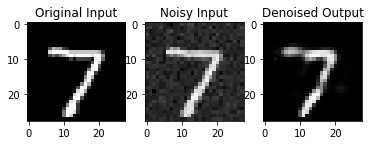

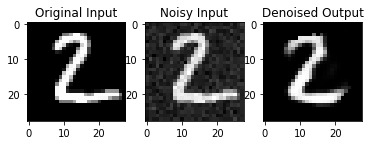

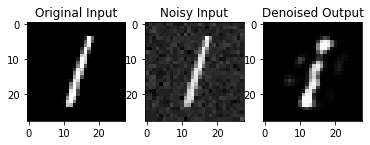

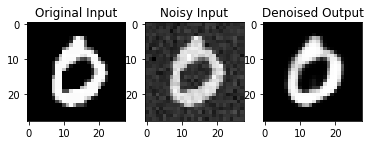

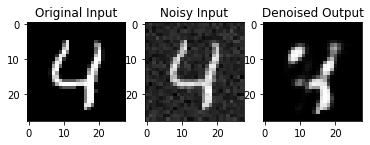

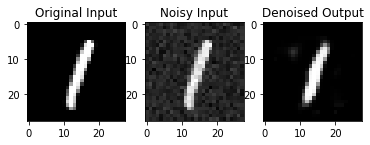

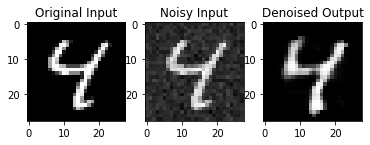

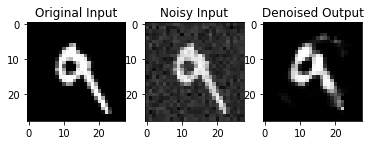

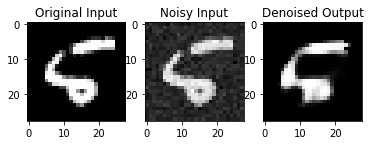

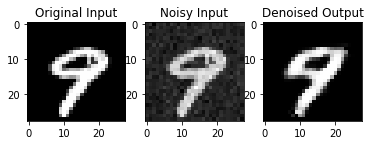

In [33]:
for i in range(n):
    figure, axis = plt.subplots(1, 3)
    axis[0].imshow(test_images[i], cmap='gray')
    axis[1].imshow(add_noise(test_images[i]), cmap='gray')
    prediction = np.squeeze(model.predict(np.expand_dims(add_noise(test_images[i]), 0)))
    axis[2].imshow(prediction, cmap='gray')
    
    axis[0].title.set_text('Original Input')
    axis[1].title.set_text('Noisy Input')
    axis[2].title.set_text('Denoised Output')